In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
data3=pd.read_csv('../input/credit-card/datasets_CC GENERAL.csv')

In [3]:
data3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
x3=data3.iloc[:,0]
x3

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [5]:
cc=data3.iloc[:,[17]].values[0:1000]
cc

array([[12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [ 8],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [11],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [11],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [12],
       [ 8],
       [12],
       [12],
       [12],
       [ 8],
       [12],
       [12],
       [ 9],
       [12],
       [12],
       [12],
       [12],
       [11],
       [12],
       [12],
       [12],
       [11],
       [12],
       [12],
       [12],
       [ 8],
       [12],
       [12],
       [12],
       [12],
       [12],
       [ 8],
       [10],
       [11],
       [12],
       [12],

In [6]:
data3.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data3['MINIMUM_PAYMENTS']=data3['MINIMUM_PAYMENTS'].fillna(data3['MINIMUM_PAYMENTS'].mean())
data3['CREDIT_LIMIT']=data3['CREDIT_LIMIT'].fillna(data3['CREDIT_LIMIT'].mean())

In [8]:
data3.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Standardizing the features
#Standardize the data
from sklearn.preprocessing import StandardScaler
sce= StandardScaler()
x=sce.fit_transform(cc)
x

array([[ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [-3.65386393],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [-0.70164422],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [-0.70164422],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0.28242902],
       [ 0

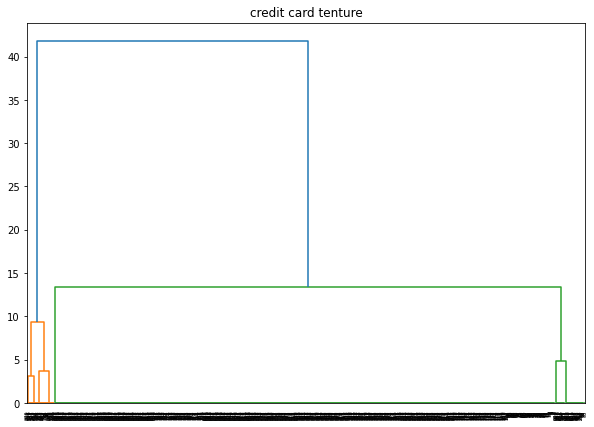

In [10]:
#drawing dendogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("credit card tenture")  
dend = shc.dendrogram(shc.linkage(cc, method='ward'))



In [11]:
#clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
d=cluster.fit_predict(cc) 
print(d) 



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 5 2 2 2 5 2 2 3 2 2 2 2 1 2 2 2 1 2 2 2 5 2 2 2 2 2 5 4
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 3 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 5 2 2 2 2
 2 2 2 1 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 4 2 1
 2 2 2 2 2 2 2 2 2 0 5 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

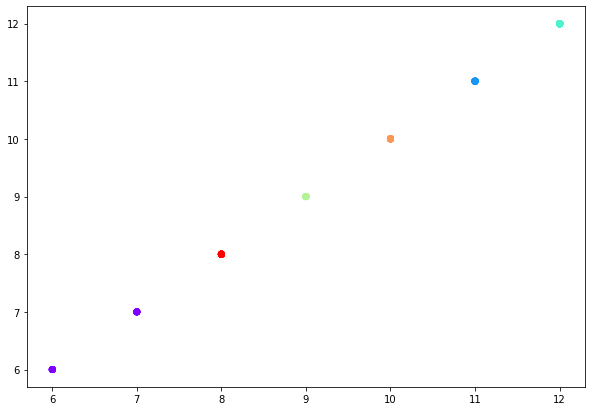

In [12]:
#Plotting 
plt.figure(figsize=(10, 7))  
plt.scatter(cc[:,0],cc[:,0], c=cluster.labels_, cmap='rainbow')

In [13]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(cc,d)
print("For n_clusters =", 6,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 6 The average silhouette_score is : 0.9921842105263159
